In [1]:
# predicting model from dataset 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# importing models 
pollution = pd.read_csv('updated_pollution_dataset.csv')
X = pollution.drop(columns=['Air Quality'])
y = pollution['Air Quality']

X = X.values
y = y.values

model = DecisionTreeClassifier()
model.fit(X, y)
predictions = model.predict([[24, 70, 5, 20, 18, 10, 1, 7, 500]])
predictions

array(['Moderate'], dtype=object)

In [2]:
pollution

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [3]:
# test and train test 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

pollution = pd.read_csv('updated_pollution_dataset.csv')
X = pollution.drop(columns=['Air Quality'])
y = pollution['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X = X.values
y = y.values

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions) #calculate accuracy

score

0.901

In [4]:
# creating joblib file and predicting directly 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

# importing models 
# pollution = pd.read_csv('updated_pollution_dataset.csv')
# X = pollution.drop(columns=['Air Quality'])
# y = pollution['Air Quality']

# X = X.values
# y = y.values

# model = DecisionTreeClassifier()
# model.fit(X, y)

joblib.dump(model, 'pollution-calculator.joblib')

# predictions = model.predict([[24, 70, 5, 20, 18, 10, 1, 7, 500]])
# predictions

model = joblib.load('pollution-calculator.joblib')
predictions = model.predict([[20, 116, 25, 65, 56, 22, 2, 22, 500]])
predictions

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Hazardous'], dtype=object)

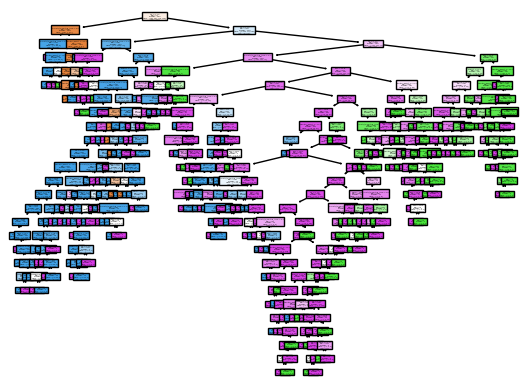

In [6]:
# plotting the decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import matplotlib.pyplot as plt

# importing models 
pollution = pd.read_csv('updated_pollution_dataset.csv')
X = pollution.drop(columns=['Air Quality'])
y = pollution['Air Quality']

# X = X.values
# y = y.values
model = DecisionTreeClassifier()
model.fit(X, y)

tree.plot_tree(model,  feature_names=X.columns,
                      class_names = sorted(y.unique()),
                      label = 'all',
                      filled = True)
plt.show()